In [105]:
import pandas as pd

## PART1: Working with HTML and JSON

### Getting Data from JSON

In [106]:
#Fetching the data from json file and storing in a dataframe dfJson
dfJson = pd.read_json("https://raw.githubusercontent.com/NNikhil89/webscraping/main/albums.json") #GitHub link for Albums.json file

In [107]:
#checking the type of dfJson
type(dfJson)

pandas.core.frame.DataFrame

In [108]:
dfJson

,Album Name,Musical Artist,Track List,Release year
0,Big Ones,Aerosmith,"[Walk On Water, Love In An Elevator, Rag Doll,...",2011
1,Plays Metallica By Four Cellos,Apocalyptica,"[Enter Sandman, Master Of Puppets, Harvester O...",2012
2,The Best Of Billy Cobham,Billy Cobham,"[Quadrant, Spanish moss A sound portrait, Snoo...",2012


### Retrieving Data from Albums HTML file

In [109]:
#Fetching the data from html file and storing in pdHTML
pdHTML = pd.read_html("https://raw.githubusercontent.com/NNikhil89/webscraping/main/albums.html") #GitHub link for Albums.html file

In [110]:
type(pdHTML)

list

* The type of pdHTML which is the output from pd.read_HTML is of list type.

* Fetching first element from pdHTML list and checking its type

In [111]:
# the first item (and in this case, the only item) in the list is a data frame
dfHTML = pdHTML[0] 
type(dfHTML)

pandas.core.frame.DataFrame

In [112]:
dfHTML

,Album Name,Musical Artist,Track List,Release year
0,Big Ones,Aerosmith,Enter Sandman Master Of Puppets Harvester Of...,2011
1,Plays Metallica By Four Cellos,Apocalyptica,Enter Sandman Master Of Puppets Harvester Of...,2012
2,The Best Of Billy Cobham,Billy Cobham,Enter Sandman Master Of Puppets Harvester Of...,2013


#### From the above results from json and html we can infer the following:
    
* The output obtained from reading json file is a dataframe whereas the result obtained from reading html is of list type
* Data present in columns Album Name, Musical Artist and Release year is same for both Json and Html output.
* The Track List column which indicates the list of Tracks in a given album is enclosed in square brackets [] indicating list for the Json output, but for Html we donot find any such characters in the Track List column.
* The tracks in Track List column are seperated by ','  in the json output where as no such separation is present in HTML output

## Scraping the Katz School’s “Staff” Web Page

#### Downloading the katz staff page and storing its contents

In [113]:
import requests

page = requests.get("https://www.yu.edu/katz/staff")
page

<Response [200]>

#### Using BeautifulSoup library to extract the Html from the page content

In [114]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [115]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-PSVTTKK');
  </script>
  <!-- End Google Tag Manager -->
  <!-- Start People Grove Cards -->
  <script async="" src="https://cdn.peoplegrove.com/pg-widge

In [116]:
list(soup.children)


['\n',
 'html',
 '\n',
 <html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
 <!-- Google Tag Manager -->
 <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                 new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
             j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
             'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
         })(window,document,'script','dataLayer','GTM-PSVTTKK');</script>
 <!-- End Google Tag Manager -->
 <!-- Start People Grove Cards -->
 <script async="" src="https://cdn.peoplegrove.com/pg-widge

#### Retrieving the html content from soup

In [117]:
content = list(soup.children)[3]
content

<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-PSVTTKK');</script>
<!-- End Google Tag Manager -->
<!-- Start People Grove Cards -->
<script async="" src="https://cdn.peoplegrove.com/pg-widgets/pg-elements-es2017.js" type="mo

##### Code to locate the div with class=”text-only”, and assign the results to a variable named staff.

In [118]:
staff = soup.find_all('div', class_='text-only')
print(staff)

[<div class="text-only">
<div class="field field--name-field-paragraph-body"><h3>Office of the Dean </h3>
<p>Paul Russo, Vice Provost and Dean <br/>
Professor of Data Science<br/><a href="/faculty/pages/russo-paul">Read Dr. Russo's Biography</a> </p>
<p>Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean <br/><a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
 <br/>
Sofia Binioris, Director of Communications and Strategic Initiatives<br/><a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a> | 645-592-4719</p>
<p>Jackie Hamilton, Executive Director of Enrollment Management and Partnerships<br/><a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> | 646-787-6194</p>
<p>Pamela Rodman, Director of Finance and Administration<br/><a href="mailto:pamela.rodman@yu.edu">pamela.rodman@yu.edu</a> | 646.592.4777</p>
<p>Tabitha Collazo, Business and Operations Coordinator<br/><a href="mailto:tabitha.collazo@yu.edu">tabitha.co

##### Creating Pandas dataframe named staff_info having columns office, name, title, email, and phone and extracting the relevant fields from staff variable

In [119]:
import re

listOfResults = [] #Dictionary having keys office, name, title, email, and phone
personalEmail = "" #variable to store email for each staff member
personalPhoneNumber = "" #variable to store phone number for each staff member
personalOffice = "" #variable to store office for each staff member
name = "" #variable to store name of each staff member
title = "" #variable to store title of each staff member

for item in staff[0].find_all(['h3', 'p']): #iterates on each h3 and p combination pair
    cnt = 0
    if item.name == 'h3':
        personalOffice = item.text.strip() #assigning personalOffice       
    elif item.name == 'p':        
        nameandTitle = item.contents[0].split(',')
        if(len(nameandTitle) >= 2):
            name = nameandTitle[0] #assigning name
            title = nameandTitle[1] #assigning title
        elif len(nameandTitle) == 1:
            name = nameandTitle[0] #assigning name
                        
        sibling_elements = item.contents[0].find_next_siblings()
        cntOfEmails = 0
        NumberOfAnchorElements = 0
        for sibling in sibling_elements:
            if sibling.name == "span":
                title = sibling.get_text().strip()
            if sibling.name == "a":
                NumberOfAnchorElements = NumberOfAnchorElements + 1                
                email_pattern = r'[\w.-]+@[\w.-]+\.\w+'
                phone_pattern = r'(?:\+\d{1,3}[-\s]?)?\d{3}[-.\s]?\d{3}[-.\s]?\d{4}|\(\d{3}\)[-.\s]?\d{3}[-.\s]?\d{4}|\+\d{1,3}[.-]\d{3}[.-]\d{3}[.-]\d{4}'
                email_match = re.findall(email_pattern, str(sibling))                
                
                if email_match: 
                    cntOfEmails = cntOfEmails + 1;                    
                    personalEmail = sibling.get_text().strip() #assigning personal email of staff                   
                    
                    indices = [index for index, ite in enumerate(item.contents) if personalEmail in ite]
                    
                    if len(indices) == 1 and cntOfEmails == 1:
                        if  len(item.contents) > (indices[0]+1):                                              
                            phoneNumber = re.findall(phone_pattern, item.contents[indices[0]+1])                            
                            if len(phoneNumber) > 0:                                
                                personalPhoneNumber = phoneNumber[0] #assigning phone number of staff
                            else:
                                personalPhoneNumber = "N/A"
                        else:
                            personalPhoneNumber = "N/A"                    
                else:
                    personalEmail = "N/A"
                    personalPhoneNumber = "N/A"
                
                if cntOfEmails == 0 or (cntOfEmails == 1 and cntOfEmails == NumberOfAnchorElements):
                    listOfResults.append({'Office': personalOffice, 'Name': name, 'Title': title, 'Email': personalEmail, 'Phone': personalPhoneNumber})                    
                
                if cntOfEmails > 1 and len(indices) == 1:
                    detailsofInnerElement = item.contents[len(item.contents) - 4]
                    name = detailsofInnerElement.split(',')[0][1:]
                    title = detailsofInnerElement.split(',')[1]
                    phoneNumber = re.findall(phone_pattern, item.contents[indices[0]+1])                                        
                    personalPhoneNumber = phoneNumber[0]
                    listOfResults.append({'Office': personalOffice, 'Name': name, 'Title': title, 'Email': personalEmail, 'Phone': personalPhoneNumber})                    
                                    

#creating staff_info Dataframe using  listOfResults dictionary
staff_info = pd.DataFrame(listOfResults)
staff_info

,Office,Name,Title,Email,Phone
0,Office of the Dean,Paul Russo,Vice Provost and Dean,N/A,N/A
1,Office of the Dean,Aaron Ross,Assistant Dean for Academic Programs and Depu...,aaron.ross2@yu.edu,646-592-4148
2,Office of the Dean,Sofia Binioris,Director of Communications and Strategic Init...,sofia.binioris@yu.edu,645-592-4719
3,Office of the Dean,Jackie Hamilton,Executive Director of Enrollment Management a...,jackie.hamilton@yu.edu,646-787-6194
4,Office of the Dean,Pamela Rodman,Director of Finance and Administration,pamela.rodman@yu.edu,646.592.4777
5,Office of the Dean,Tabitha Collazo,Business and Operations Coordinator,tabitha.collazo@yu.edu,646-592-4735
6,Office of the Dean,Ann Leary,Office Manager/Executive Assistant to the Dean...,ann.leary@yu.edu,646-592-4724
7,Graduate Admissions,Jared Hakimi,Director,jared.hakimi@yu.edu,646-592-4722
8,Graduate Admissions,Xavier Velasquez,Associate Director of Graduate Admissions Ope...,xavier.velasquez@yu.edu,646-592-4737
9,Graduate Admissions,Shayna Matzner,Assistant Director,shayna.matzner@yu.edu,646-592-4726


### Working with Web API’s

##### Using newsdata.io api to fetch the latest breaking news in technology using the url https://newsdata.io/api/1/news?apikey=pub_40621c1d11dc0a5c57ca4f82b4edde2ea8042&q=technology&language=en

In [7]:
import requests
import pandas as pd
from pprint import pprint


def news_data():
    # submit our request via the newsdata.io api
    # note the inclusion of the required API key
    res=requests.get('https://newsdata.io/api/1/news?apikey=pub_40621c1d11dc0a5c57ca4f82b4edde2ea8042&q=technology&language=en');
    return res.json();

w_data=news_data()
w_data

{'status': 'success', 'totalResults': 7381, 'results': [{'article_id': '111af4c8a0d835b51ba92f9b1eb2aca6', 'title': 'Integrating modern technology, including AI, crucial for health sector advancement- President', 'link': 'http://www.adaderana.lk/news.php?nid=98154', 'keywords': None, 'creator': None, 'video_url': None, 'description': 'President Ranil Wickremesinghe, raising concerns about the brain drain of medical professionals, said that approximately 30 - 40 out of every 100 doctors or nurses trained in the country opt to leave, a circumstance which he deemed unfavourable for the nation. MORE..', 'content': 'ONLY AVAILABLE IN PAID PLANS', 'pubDate': '2024-03-23 12:28:36', 'image_url': 'https://adaderanaenglish.s3.amazonaws.com/1711197736-Point-Pedro-Base-Hospital-Opening-Ceremony-1.jpg', 'source_id': 'adaderana', 'source_url': 'https://www.adaderana.lk', 'source_icon': 'https://i.bytvi.com/domain_icons/adaderana.png', 'source_priority': 223286, 'country': ['sri lanka'], 'category': 

##### Checking the type of w_data

In [10]:
type(w_data)

dict

##### Creating Dataframe from w_data

In [53]:
df = pd.DataFrame(w_data['results'], columns = ['title', 'link', 'keywords', 'creator', 'video_url', 'description', 'content',
                                               'pubDate', 'country', 'category', 'source_id'])

In [54]:
df

,title,link,keywords,creator,video_url,description,content,pubDate,country,category,source_id
0,Did You Fall for These Well-Known April Fools’...,https://gvwire.com/2024/03/23/did-you-fall-for...,"[entertainment, latest, lifestyle]",[Associated Press],None,April Fools’ Day has become a global playgroun...,ONLY AVAILABLE IN PAID PLANS,2024-03-23 12:30:28,[united states of america],[entertainment],gvwire
1,Gates Industrial: Further Upside Is Still Just...,https://seekingalpha.com/article/4680085-gates...,"[gtes, daniel jones]",None,None,None,ONLY AVAILABLE IN PAID PLANS,2024-03-23 12:30:22,[canada],[business],seekingalpha
2,"AI-Assistants, Chatbots Lack Safeguards From C...",https://www.ndtvprofit.com/technology/ai-assis...,"[technology, pti]",[PTI],None,Researchers are calling for enhanced regulatio...,ONLY AVAILABLE IN PAID PLANS,2024-03-23 12:30:15,[india],[business],bloombergquint
3,Fox News AI Newsletter: IRS AI snooping on tax...,https://www.foxnews.com/tech/fox-news-ai-newsl...,"[ae6a77cf-0790-5145-bd81-945f2066f04f, fnc, fo...",None,None,Stay up to date on the latest AI technology ad...,ONLY AVAILABLE IN PAID PLANS,2024-03-23 12:30:10,[united states of america],"[science, technology]",foxnews
4,Super Micro Computer: I Was So Wrong About Thi...,https://seekingalpha.com/article/4680021-super...,"[nvda, nvda:ca, smci, jr research]",None,None,None,ONLY AVAILABLE IN PAID PLANS,2024-03-23 12:30:00,[canada],[business],seekingalpha
5,Growth Projection and Trends in North America'...,https://kalkinemedia.com/news/world-news/growt...,None,[info@kalkinemedia.com (EIN Presswire)],None,"CHICAGO, UNITED STATES, March 23, 2024 /EINPre...",ONLY AVAILABLE IN PAID PLANS,2024-03-23 12:30:00,[australia],[top],kalkinemedia
6,Super Micro Computer: I Was So Wrong About Thi...,https://seekingalpha.com/article/4680021-super...,"[nvda, nvda:ca, smci, jr research]",None,None,None,ONLY AVAILABLE IN PAID PLANS,2024-03-23 12:30:00,[canada],[business],seekingalpha
7,Super Micro Computer: I Was So Wrong About Thi...,https://seekingalpha.com/article/4680021-super...,"[nvda, nvda:ca, smci, jr research]",None,None,None,ONLY AVAILABLE IN PAID PLANS,2024-03-23 12:30:00,[canada],[business],seekingalpha
8,Google will begin to display AI-powered search...,https://researchsnipers.com/google-will-begin-...,"[artificial intelligence, google, technology, ...",[RS News],None,"Research Snipers If you live in the US, you ma...",ONLY AVAILABLE IN PAID PLANS,2024-03-23 12:30:00,[united states of america],[top],researchsnipers
9,"Integrating modern technology, including AI, c...",http://www.adaderana.lk/news.php?nid=98154,None,None,None,"President Ranil Wickremesinghe, raising concer...",ONLY AVAILABLE IN PAID PLANS,2024-03-23 12:28:36,[sri lanka],[top],adaderana


In [63]:
len(df)

10

In [64]:
df.dtypes

title          object
link           object
keywords       object
creator        object
description    object
content        object
pubDate        object
country        object
category       object
source_id      object
dtype: object

* The data types of all the columns are object types
* Here category, source_id are categorical nominal 

#### Checking for null values

In [56]:
df.isna().sum()

title           0
link            0
keywords        2
creator         6
video_url      10
description     4
content         0
pubDate         0
country         0
category        0
source_id       0
dtype: int64

* When we check the null values in the columns, we can see that video_url column contains all null values hence it can be deleted.
* The other null values are in keywords, creator and description columns

In [58]:
del df["video_url"]

In [60]:
df.isna().sum()

title          0
link           0
keywords       2
creator        6
description    4
content        0
pubDate        0
country        0
category       0
source_id      0
dtype: int64

#### Bar plot for Source_id column

<Axes: title={'center': 'Differnet Sources of News'}, xlabel='source_id'>

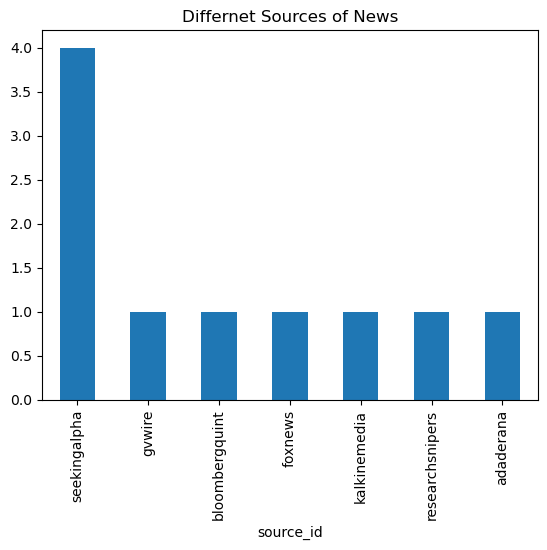

In [61]:
df.source_id.value_counts().plot.bar(title = "Differnet Sources of News")

* We can see that the news feed is mainly from the seekingalpha source id

#### Bar plot for category column

<Axes: title={'center': 'Different Categories of Breaking News'}, xlabel='category'>

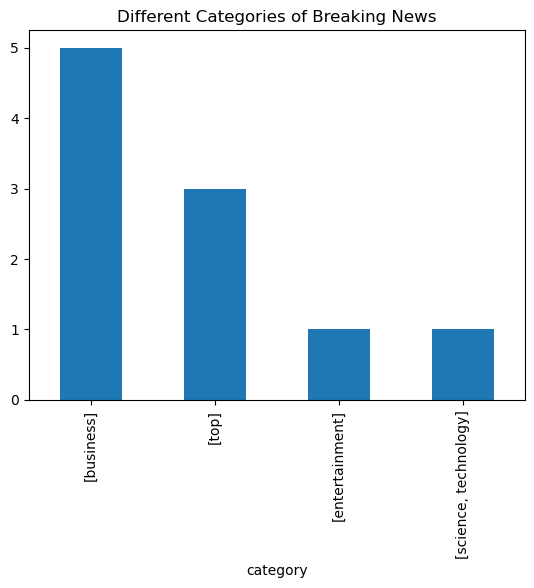

In [68]:
df.category.value_counts().plot.bar(title="Different Categories of Breaking News")

* We can see that the news feed is mainly from the business category

#### Lets check whether AI is a buzz word in the top technology news that we got from API

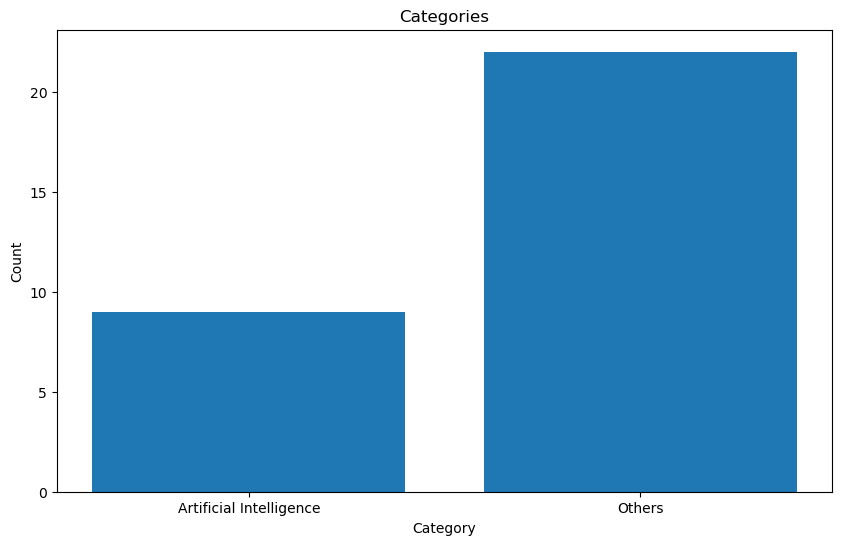

In [82]:
cntAI = 0
others = 0
for item in df.keywords:
    if item and len(item) > 0:
        for items in item:
            if items.find('ai-powered') > -1 or items.find('artificial-')>-1 or items.find('nvda')>-1:
                cntAI = cntAI + 1
            else:
                others = others + 1
                
data = {'Category': ['Artificial Intelligence', 'Others'],
        'Count': [cntAI, others]}
dfBuzzWords = pd.DataFrame(data)

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(dfBuzzWords['Category'], dfBuzzWords['Count'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Categories')
plt.show()                     

* As we observe among the 30 different categories listed, around 10 categories are related to Artificial Intelligence which is the buzz word in techinology field as of now

#### Conclusion:
#### From the above data analysis of the dataset imported from the given API regarding the latest breaking news in technology field in the past couple of days, we can find the following observations:
* Category, source_id columns are categorical nominal type. 
* The dataset had columns with null values and since video_url column contains all null values, this column has been deleted.
* We can infer that the main source of news feed on technology is from the seekingalpha source.
* The business category news has appeared frequently in the news feed on technology.
* Based on the visual analysis we can infer that AI is a buzz word in the top technology news that we got from API.